# LIGHT GBM

In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [3]:
from lightgbm import LGBMClassifier

In [4]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# !pip install lightgbm
# !conda install -c conda-forge lightgbm

In [6]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [7]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           d:\btkakademi_turkcellgy\.tgy_veribilimi\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators :

In [8]:
# class_wight : DENGESİZ SINIF PROBLEMİ AYARI
# DENGESİZ SINIF PROBLEMİ : Örneğin sınıfların oranı %10, %90 olması gibi durumlardır.
# min_split_gain : hatalarda meydana getirilmesi gereken minimum düşüşü ifade eder ki ancak bundan sonra ben seni bölerim dallanmalar devam eder, ayırmalar devam eder anlamına gelir.

In [9]:
y_pred = lgbm_model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7229437229437229

In [11]:
# MODEL TUNNING

In [12]:
lgbm = LGBMClassifier()

In [13]:
lgbm_params = {"learning_rate":[0.001, 0.01, 0.1], "n_estimators":[200, 500, 1000], "max_depth":[1,2,35,8]}

In [14]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.9s finished


In [15]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [16]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [17]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [18]:
# DEĞİŞKEN ÖNEM DÜZEYLERİ

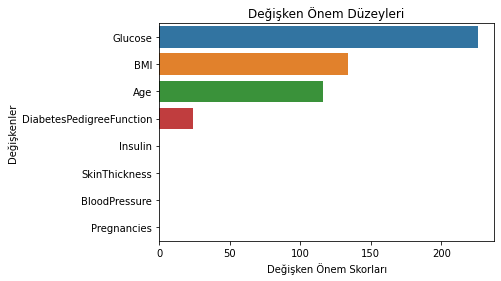

In [19]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()